Import the predictor

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
from Code.predictor import ScopeBO
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw

### Generating the search space

In this example, we will generate a search space for the reaction of phosphines with alkyl iodides and start generating a scope.

Provide a list of samples for the first reactant

Smiles for the first reactant:


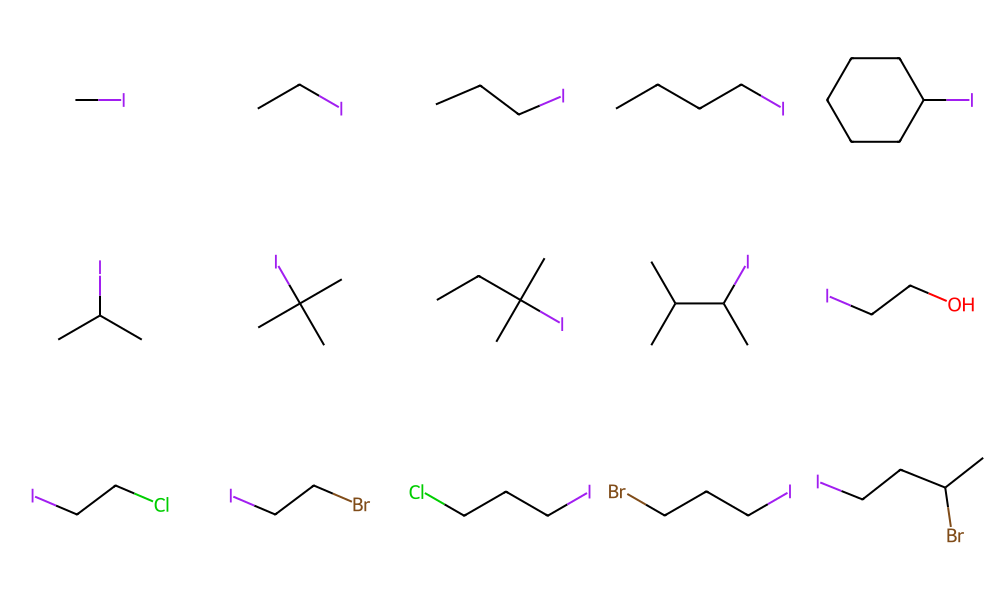

In [2]:
# provide the list of smiles for the alkyl iodide starting materials
smiles1 = ["CI","CCI","CCCI","CCCCI", "C1CCCCC1I","CC(C)I","CC(C)(C)I","CCC(C)(C)I","CC(C)C(C)I","OCCI","ClCCI","BrCCI",
           "ClCCCI","BrCCCI","CC(Br)CCI"]

# instead of providing the full list here, the list can also be read in from a csv file.
# here is some example code for this (assuming the smiles are in the first column and there is a column header in the first line
# (smiles starting on line 2))
# if you want to use this, remove the hash at the beginning of the next line
#smiles1 = pd.read_csv("filename.csv",index_col=0,header=0).index.to_list()

# visualize the molecules
mol1 = [Chem.MolFromSmiles(smiles) for smiles in smiles1]
print("Smiles for the first reactant:")
Draw.MolsToGridImage(mol1,molsPerRow=5)

Generate features using the smiles list

This might take several minutes or even hours. Please stand by.
Atom properties will be calculated for the following common substructure:


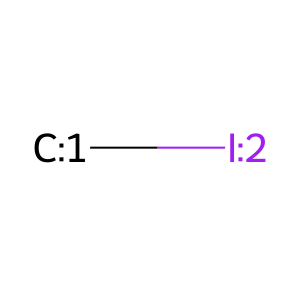

100%|██████████| 15/15 [00:30<00:00,  2.06s/it]

Finished descriptor calculation.


,SASA,Volume,HOMO,LUMO,IP,EA,Dipole,C_1_BV,C_1_SASA,C_1_P_int,...,C_1_electrophilicity,C_1_nucleophilicity,C_1_radicalFukui,I_1_BV,I_1_SASA,I_1_P_int,I_1_charge,I_1_electrophilicity,I_1_nucleophilicity,I_1_radicalFukui
ClCCI,244.784847,129.563460,-0.421480,-0.254765,9.534655,-1.018180,0.880955,0.451279,4.521359,25.338060,...,0.032131,-0.028224,0.001953,0.195428,92.174898,19.467851,-0.122810,0.367537,0.362050,0.364793
BrCCI,252.281108,136.373085,-0.424785,-0.265952,9.586052,-0.441051,0.130045,0.456235,4.270924,26.443056,...,0.009899,-0.028330,-0.009215,0.194330,92.381291,19.622270,-0.123748,0.314134,0.369506,0.341820
ClCCCI,268.323472,151.663739,-0.410241,-0.240026,9.102629,-1.526762,1.410144,0.481752,5.403160,25.106049,...,0.045916,-0.021474,0.012221,0.208242,88.218368,19.926290,-0.146151,0.339010,0.341709,0.340360
BrCCCI,276.758056,159.516491,-0.413236,-0.246481,9.143685,-0.865126,1.523659,0.474005,5.191649,26.413554,...,0.025324,-0.020634,0.002345,0.206508,88.581429,20.066888,-0.143370,0.265731,0.342916,0.304323
CC(Br)CCI,300.675829,182.962702,-0.409901,-0.243327,8.987588,-0.868215,1.628003,0.488971,5.202392,26.653934,...,0.020991,-0.022475,-0.000742,0.207755,88.265710,20.336449,-0.146899,0.251507,0.324787,0.288147
CI,186.642634,84.788431,-0.408318,-0.231409,10.177248,-2.280407,1.451484,0.232674,21.620505,18.480703,...,0.029576,-0.033723,-0.002074,0.162144,100.842279,18.404048,-0.138625,0.471435,0.574060,0.522747
CCI,217.742410,109.615562,-0.404139,-0.233020,9.716175,-2.035635,1.563101,0.388616,6.430150,21.681898,...,0.074667,-0.018743,0.027962,0.190097,93.142105,19.075110,-0.155808,0.443481,0.464470,0.453975
CCCI,244.670753,133.235606,-0.402517,-0.230891,9.407517,-2.024208,1.602353,0.442587,5.532008,23.660328,...,0.072486,-0.023813,0.024337,0.205148,88.778894,19.580352,-0.158043,0.435597,0.402516,0.419056
CCCCI,274.839894,157.324369,-0.402234,-0.230929,9.090307,-1.997149,1.620644,0.449772,5.194764,24.533272,...,0.072709,-0.021209,0.025750,0.202826,89.369583,19.741944,-0.158453,0.433499,0.354848,0.394174
C1CCCCC1I,293.073124,185.722856,-0.398283,-0.231873,8.843737,-1.754879,1.749283,0.611972,0.076953,33.073760,...,0.102410,-0.002324,0.050043,0.234047,81.680743,20.516212,-0.175403,0.405333,0.331380,0.368357


In [3]:
ScopeBO.generate_features(smiles1,  # list of smiles (see prior cell)
                          common_core="CI",  # provide the SMARTS for the shared atoms for which atom descriptors will be calculated
                          filename="reactant1.csv")  # name for the created file with the descriptors

Smiles list for the second reactant

Smiles for the second reactant:


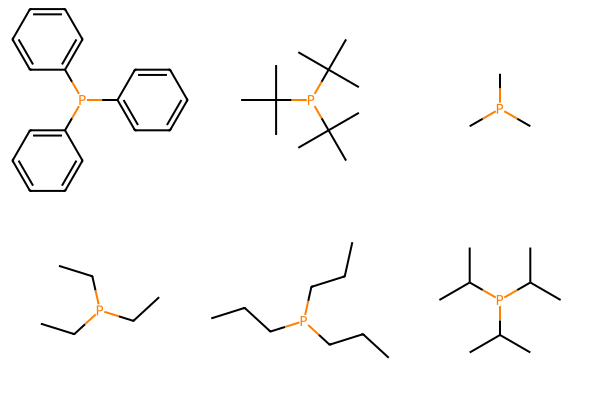

In [4]:
# smiles list for the second reactant (phosphines)
smiles2 = ["P(C1=CC=CC=C1)(C2=CC=CC=C2)C3=CC=CC=C3",
           "CC(C)(C)P(C(C)(C)C)C(C)(C)C",
           "P(C)(C)C",
           "P(CC)(CC)CC",
           "P(CCC)(CCC)CCC",
           "P(C(C)C)(C(C)C)C(C)C"]

# look at the structures
mol1 = [Chem.MolFromSmiles(smiles) for smiles in smiles2]
print("Smiles for the second reactant:")
Draw.MolsToGridImage(mol1)

Generate features for the second reactant

This might take several minutes or even hours. Please stand by.
Atom properties will be calculated for the following common substructure:


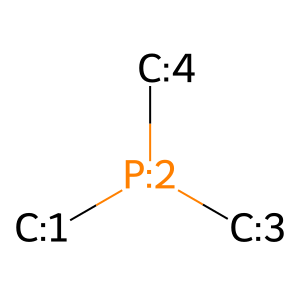

100%|██████████| 6/6 [01:21<00:00, 13.56s/it]

Finished descriptor calculation.


,SASA,Volume,HOMO,LUMO,IP,EA,Dipole,C_1_BV,C_1_SASA,C_1_P_int,...,C_2_electrophilicity,C_2_nucleophilicity,C_2_radicalFukui,C_3_BV,C_3_SASA,C_3_P_int,C_3_charge,C_3_electrophilicity,C_3_nucleophilicity,C_3_radicalFukui
P(C1=CC=CC=C1)(C2=CC=CC=C2)C3=CC=CC=C3,476.095803,335.813928,-0.366304,-0.238659,7.294868,-0.271541,0.589617,0.723974,1.562037,32.958548,...,0.003254,-0.017481,-0.007113,0.723990,1.564037,33.614078,0.016737,0.003259,-0.017483,-0.007112
CC(C)(C)P(C(C)(C)C)C(C)(C)C,393.599493,322.301921,-0.344248,-0.153942,7.143167,-3.028522,0.529619,0.743253,0.000000,0.000000,...,-0.034989,-0.015835,-0.025412,0.743126,0.000000,0.000000,0.036755,-0.034988,-0.015834,-0.025411
P(C)(C)C,238.105644,129.102449,-0.369419,-0.146797,8.230202,-3.527439,0.745594,0.300963,15.755368,19.594742,...,-0.107096,-0.074265,-0.090681,0.300905,15.760368,19.681154,-0.101231,-0.107096,-0.074265,-0.090681
P(CC)(CC)CC,318.408940,199.428774,-0.365679,-0.152998,7.922281,-3.281948,0.652916,0.478286,3.564288,23.715433,...,-0.079295,-0.045760,-0.062527,0.475761,3.597905,24.233962,-0.051128,-0.078738,-0.046153,-0.062445
P(CCC)(CCC)CCC,408.510955,271.575185,-0.365362,-0.152770,7.825907,-3.224675,0.679366,0.532290,1.822806,28.380926,...,-0.078090,-0.042809,-0.060449,0.531249,2.237860,26.825917,-0.053282,-0.078345,-0.043254,-0.060800
P(C(C)C)(C(C)C)C(C)C,364.585150,263.550839,-0.355563,-0.153386,7.520335,-3.151906,0.620233,0.638017,0.072002,22.730716,...,-0.055786,-0.028966,-0.042376,0.639131,0.012000,30.934305,-0.004396,-0.053739,-0.028450,-0.041094


In [5]:
ScopeBO.generate_features(smiles2,  # list of smiles (see prior cell)
                          common_core="[C,c]P([C,c])[C,c]",  # provide the SMARTS for the shared atoms for which atom descriptors will be calculated
                          filename="reactant2.csv")  # name for the created file with the descriptors

Create the search space using the generated features. This will be also generate suggestions for three initial scope entries by random sampling. We however recommend to select the first three examples manually by choosing three entries that are assumed to perform well in the reaction and to start the algorithmic suggestions after the results for these samples have been added to the searchspace. See the SI of our publication for details.

Note that you can also use the main scope suggestion function (run — see below) to get initial random suggestions if you already have a search space file ready.

Now doing feature preprocessing.
The following features were removed: ['AlkI_Volume', 'AlkI_IP', 'AlkI_C_1_nucleophilicity', 'AlkI_C_1_radicalFukui', 'AlkI_I_1_BV', 'AlkI_I_1_SASA', 'AlkI_I_1_P_int', 'AlkI_I_1_charge', 'Phos_EA', 'Phos_Dipole', 'Phos_C_1_BV', 'Phos_C_1_charge', 'Phos_C_1_nucleophilicity', 'Phos_C_1_radicalFukui', 'Phos_P_1_BV', 'Phos_P_1_SASA', 'Phos_P_1_P_int', 'Phos_P_1_electrophilicity', 'Phos_P_1_nucleophilicity', 'Phos_P_1_radicalFukui', 'Phos_C_2_BV', 'Phos_C_2_SASA', 'Phos_C_2_P_int', 'Phos_C_2_charge', 'Phos_C_2_electrophilicity', 'Phos_C_2_nucleophilicity', 'Phos_C_2_radicalFukui', 'Phos_C_3_BV', 'Phos_C_3_SASA', 'Phos_C_3_P_int', 'Phos_C_3_charge', 'Phos_C_3_electrophilicity', 'Phos_C_3_nucleophilicity', 'Phos_C_3_radicalFukui']
The final search space has 22 features.
Generation of reaction space completed!

Suggesting initial scope entries by random sampling...
Generated 3 initial samples using random sampling (random seed = 42). Run finished!
Suggested samp

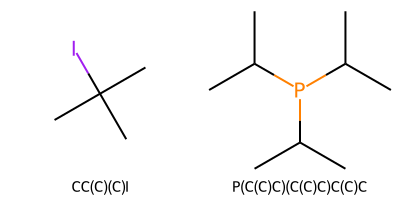

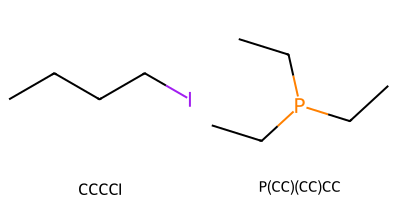

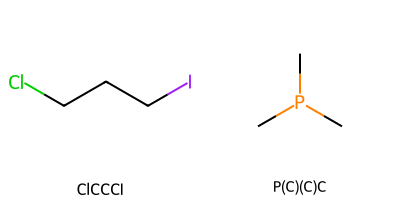

,AlkI_SASA,AlkI_HOMO,AlkI_LUMO,AlkI_EA,AlkI_Dipole,AlkI_C_1_BV,AlkI_C_1_SASA,AlkI_C_1_P_int,AlkI_C_1_charge,AlkI_C_1_electrophilicity,...,Phos_Volume,Phos_HOMO,Phos_LUMO,Phos_IP,Phos_C_1_SASA,Phos_C_1_P_int,Phos_C_1_electrophilicity,Phos_P_1_charge,yield,priority
CC(C)(C)I.P(C(C)C)(C(C)C)C(C)C,262.917309,-0.397556,-0.237575,-1.573800,1.724610,0.626968,0.000000,0.000000,0.084700,0.129850,...,263.550839,-0.355563,-0.153386,7.520335,0.072002,22.730716,-0.056090,-0.136051,PENDING,1.0
CCCCI.P(CC)(CC)CC,274.839894,-0.402234,-0.230929,-1.997149,1.620644,0.449772,5.194764,24.533272,0.001953,0.072709,...,199.428774,-0.365679,-0.152998,7.922281,3.564288,23.715433,-0.079000,-0.106588,PENDING,1.0
ClCCCI.P(C)(C)C,268.323472,-0.410241,-0.240026,-1.526762,1.410144,0.481752,5.403160,25.106049,-0.001758,0.045916,...,129.102449,-0.369419,-0.146797,8.230202,15.755368,19.594742,-0.107096,-0.094885,PENDING,1.0
ClCCI.P(C1=CC=CC=C1)(C2=CC=CC=C2)C3=CC=CC=C3,244.784847,-0.421480,-0.254765,-1.018180,0.880955,0.451279,4.521359,25.338060,-0.006075,0.032131,...,335.813928,-0.366304,-0.238659,7.294868,1.562037,32.958548,0.003254,-0.110390,PENDING,0
C1CCCCC1I.P(CCC)(CCC)CCC,293.073124,-0.398283,-0.231873,-1.754879,1.749283,0.611972,0.076953,33.073760,0.043606,0.102410,...,271.575185,-0.365362,-0.152770,7.825907,1.822806,28.380926,-0.078216,-0.126537,PENDING,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CC(Br)CCI.P(C(C)C)(C(C)C)C(C)C,300.675829,-0.409901,-0.243327,-0.868215,1.628003,0.488971,5.202392,26.653934,-0.001671,0.020991,...,263.550839,-0.355563,-0.153386,7.520335,0.072002,22.730716,-0.056090,-0.136051,PENDING,0
CC(Br)CCI.P(CCC)(CCC)CCC,300.675829,-0.409901,-0.243327,-0.868215,1.628003,0.488971,5.202392,26.653934,-0.001671,0.020991,...,271.575185,-0.365362,-0.152770,7.825907,1.822806,28.380926,-0.078216,-0.126537,PENDING,0
CC(Br)CCI.P(CC)(CC)CC,300.675829,-0.409901,-0.243327,-0.868215,1.628003,0.488971,5.202392,26.653934,-0.001671,0.020991,...,199.428774,-0.365679,-0.152998,7.922281,3.564288,23.715433,-0.079000,-0.106588,PENDING,0
CC(Br)CCI.P(C)(C)C,300.675829,-0.409901,-0.243327,-0.868215,1.628003,0.488971,5.202392,26.653934,-0.001671,0.020991,...,129.102449,-0.369419,-0.146797,8.230202,15.755368,19.594742,-0.107096,-0.094885,PENDING,0


In [6]:
df = ScopeBO().create_reaction_space(
    reactants = {'reactant1.csv': "AlkI",'reactant2.csv': "Phos"},  # names of the files containing the descriptors + labels features
    feature_processing=True,  # do feature preprocessing
    filename="reaction_space.csv",  # name of the created search space
    objectives=['yield'],  # name(s) of the objective column(s)
    )

# look at the search space
df

The search space contains columns for the features as well as the objective columns (here: yield) and a priority column.

In [7]:
# explanation of the priority values:
# 1: suggested samples
# 0.9–0.5: alternative suggestions if a suggested sample cannot be run (lower priority values indicate lower ranking)
# 0: neutral samples
# -1: samples that were removed from consideration by the Vendi pruning
# -2: samples that have already been evaluated

# in the first round, the only priority values are 1 and 0 as no samples have been evaluated yet.

Adding experimental data

In [8]:
# you can add results by opening your search space file by opening it in excel and replacing the PENDING labels
# or you can also do it directly in the notebook as below

# read in the search space
df = pd.read_csv('./reaction_space.csv',index_col=0,header=0)

# add the  objective values (these are dummy values in this case)
# as the search space is sorted by priority, you can simply replace the yield values for the first three lines 
# (since three samples were suggested)
# the order is the same as in the print of run function above. note that the numbering starts at 0
df['yield'].iat[0] = 1  # iat indicates the row in the table (0 = first row); let's say the yield for this reaction was 1%
df['yield'].iat[1] = 90
df['yield'].iat[2] = 10

# same the file under a different name to keep track of the different rounds
df.to_csv('./reaction_space_round1.csv')

df

,AlkI_SASA,AlkI_HOMO,AlkI_LUMO,AlkI_EA,AlkI_Dipole,AlkI_C_1_BV,AlkI_C_1_SASA,AlkI_C_1_P_int,AlkI_C_1_charge,AlkI_C_1_electrophilicity,...,Phos_Volume,Phos_HOMO,Phos_LUMO,Phos_IP,Phos_C_1_SASA,Phos_C_1_P_int,Phos_C_1_electrophilicity,Phos_P_1_charge,yield,priority
CC(C)(C)I.P(C(C)C)(C(C)C)C(C)C,262.917309,-0.397556,-0.237575,-1.573800,1.724610,0.626968,0.000000,0.000000,0.084700,0.129850,...,263.550839,-0.355563,-0.153386,7.520335,0.072002,22.730716,-0.056090,-0.136051,1,1.0
CCCCI.P(CC)(CC)CC,274.839894,-0.402234,-0.230929,-1.997149,1.620644,0.449772,5.194764,24.533272,0.001953,0.072709,...,199.428774,-0.365679,-0.152998,7.922281,3.564288,23.715433,-0.079000,-0.106588,90,1.0
ClCCCI.P(C)(C)C,268.323472,-0.410241,-0.240026,-1.526762,1.410144,0.481752,5.403160,25.106049,-0.001758,0.045916,...,129.102449,-0.369419,-0.146797,8.230202,15.755368,19.594742,-0.107096,-0.094885,10,1.0
ClCCI.P(C1=CC=CC=C1)(C2=CC=CC=C2)C3=CC=CC=C3,244.784847,-0.421480,-0.254765,-1.018180,0.880955,0.451279,4.521359,25.338060,-0.006075,0.032131,...,335.813928,-0.366304,-0.238659,7.294868,1.562037,32.958548,0.003254,-0.110390,PENDING,0.0
C1CCCCC1I.P(CCC)(CCC)CCC,293.073124,-0.398283,-0.231873,-1.754879,1.749283,0.611972,0.076953,33.073760,0.043606,0.102410,...,271.575185,-0.365362,-0.152770,7.825907,1.822806,28.380926,-0.078216,-0.126537,PENDING,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CC(Br)CCI.P(C(C)C)(C(C)C)C(C)C,300.675829,-0.409901,-0.243327,-0.868215,1.628003,0.488971,5.202392,26.653934,-0.001671,0.020991,...,263.550839,-0.355563,-0.153386,7.520335,0.072002,22.730716,-0.056090,-0.136051,PENDING,0.0
CC(Br)CCI.P(CCC)(CCC)CCC,300.675829,-0.409901,-0.243327,-0.868215,1.628003,0.488971,5.202392,26.653934,-0.001671,0.020991,...,271.575185,-0.365362,-0.152770,7.825907,1.822806,28.380926,-0.078216,-0.126537,PENDING,0.0
CC(Br)CCI.P(CC)(CC)CC,300.675829,-0.409901,-0.243327,-0.868215,1.628003,0.488971,5.202392,26.653934,-0.001671,0.020991,...,199.428774,-0.365679,-0.152998,7.922281,3.564288,23.715433,-0.079000,-0.106588,PENDING,0.0
CC(Br)CCI.P(C)(C)C,300.675829,-0.409901,-0.243327,-0.868215,1.628003,0.488971,5.202392,26.653934,-0.001671,0.020991,...,129.102449,-0.369419,-0.146797,8.230202,15.755368,19.594742,-0.107096,-0.094885,PENDING,0.0


Run with data. This will now use the main optimization function (run) to get the scope predictions.

Found 3 existing scope entries.
Cut 12 samples from the search space via Vendi pruning. 75 samples remain.
Selecting sample 1 of 3...
Selecting sample 2 of 3...
Selecting sample 3 of 3...
The run finished sucessfully!
These are the suggested substrate combinations:


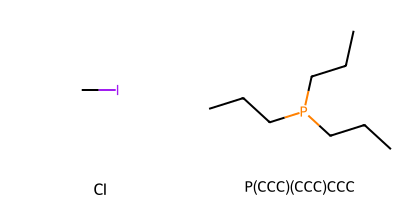

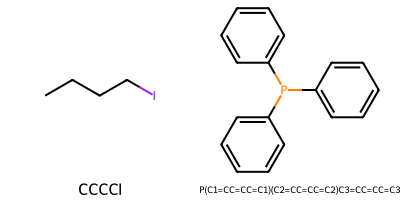

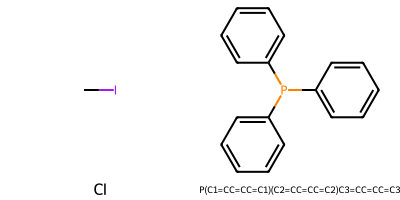

These are the requested alternative suggestions, sorted by descending priority:


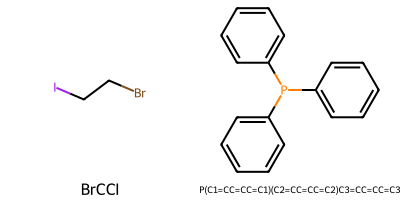

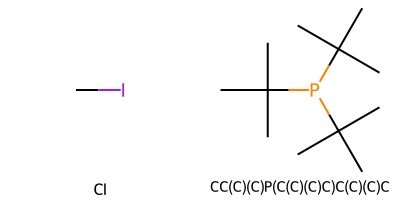

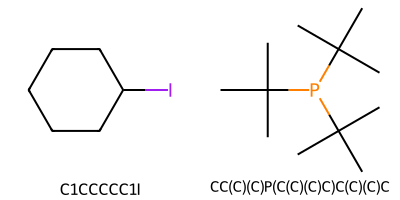

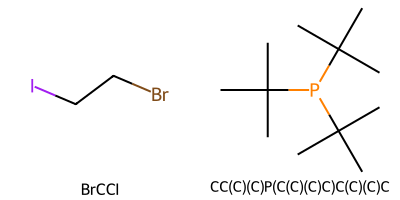

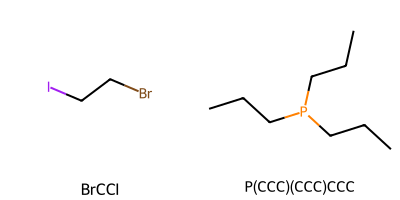

,AlkI_SASA,AlkI_HOMO,AlkI_LUMO,AlkI_EA,AlkI_Dipole,AlkI_C_1_BV,AlkI_C_1_SASA,AlkI_C_1_P_int,AlkI_C_1_charge,AlkI_C_1_electrophilicity,...,Phos_Volume,Phos_HOMO,Phos_LUMO,Phos_IP,Phos_C_1_SASA,Phos_C_1_P_int,Phos_C_1_electrophilicity,Phos_P_1_charge,yield,priority
CI.P(CCC)(CCC)CCC,186.642634,-0.408318,-0.231409,-2.280407,1.451484,0.232674,21.620505,18.480703,-0.047198,0.029576,...,271.575185,-0.365362,-0.152770,7.825907,1.822806,28.380926,-0.078216,-0.126537,PENDING,1.0
CCCCI.P(C1=CC=CC=C1)(C2=CC=CC=C2)C3=CC=CC=C3,274.839894,-0.402234,-0.230929,-1.997149,1.620644,0.449772,5.194764,24.533272,0.001953,0.072709,...,335.813928,-0.366304,-0.238659,7.294868,1.562037,32.958548,0.003254,-0.110390,PENDING,1.0
CI.P(C1=CC=CC=C1)(C2=CC=CC=C2)C3=CC=CC=C3,186.642634,-0.408318,-0.231409,-2.280407,1.451484,0.232674,21.620505,18.480703,-0.047198,0.029576,...,335.813928,-0.366304,-0.238659,7.294868,1.562037,32.958548,0.003254,-0.110390,PENDING,1.0
BrCCI.P(C1=CC=CC=C1)(C2=CC=CC=C2)C3=CC=CC=C3,252.281108,-0.424785,-0.265952,-0.441051,0.130045,0.456235,4.270924,26.443056,0.000588,0.009899,...,335.813928,-0.366304,-0.238659,7.294868,1.562037,32.958548,0.003254,-0.110390,PENDING,0.9
CI.CC(C)(C)P(C(C)(C)C)C(C)(C)C,186.642634,-0.408318,-0.231409,-2.280407,1.451484,0.232674,21.620505,18.480703,-0.047198,0.029576,...,322.301921,-0.344248,-0.153942,7.143167,0.000000,0.000000,-0.034990,-0.138842,PENDING,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C1CCCCC1I.P(CC)(CC)CC,293.073124,-0.398283,-0.231873,-1.754879,1.749283,0.611972,0.076953,33.073760,0.043606,0.102410,...,199.428774,-0.365679,-0.152998,7.922281,3.564288,23.715433,-0.079000,-0.106588,PENDING,-1.0
CC(C)I.P(CC)(CC)CC,242.902322,-0.400897,-0.235196,-1.796649,1.652988,0.517250,0.240006,27.931948,0.049040,0.106570,...,199.428774,-0.365679,-0.152998,7.922281,3.564288,23.715433,-0.079000,-0.106588,PENDING,-1.0
CCCCI.P(CC)(CC)CC,274.839894,-0.402234,-0.230929,-1.997149,1.620644,0.449772,5.194764,24.533272,0.001953,0.072709,...,199.428774,-0.365679,-0.152998,7.922281,3.564288,23.715433,-0.079000,-0.106588,90,-2.0
ClCCCI.P(C)(C)C,268.323472,-0.410241,-0.240026,-1.526762,1.410144,0.481752,5.403160,25.106049,-0.001758,0.045916,...,129.102449,-0.369419,-0.146797,8.230202,15.755368,19.594742,-0.107096,-0.094885,10,-2.0


In [9]:
# run the algorithm again (note that this uses the file that has been updated with the results)
ScopeBO().run(
    objectives=['yield'], # reaction objectives (for multi-objective cases (e. g. yield and ee), use ['yield','ee'])
    filename='reaction_space_round1.csv' # name of the search space
)

In [10]:
# if you have a minimization objective, provide the extra keyword objective_mode to the algorithm as below
# (remove the hashes for each line after this one)

#ScopeBO().run(
#    objectives=['yield','cost'],
#    objective_mode={'cost': 'min'}
#    filename="reaction_space.csv"
#)

Adding results again

In [11]:
df = pd.read_csv('./reaction_space_round1.csv',index_col=0,header=0)
df['yield'].iat[0] = 10
df['yield'].iat[1] = 0
df['yield'].iat[2] = 50

df.to_csv('./reaction_space_round2.csv')

df

,AlkI_SASA,AlkI_HOMO,AlkI_LUMO,AlkI_EA,AlkI_Dipole,AlkI_C_1_BV,AlkI_C_1_SASA,AlkI_C_1_P_int,AlkI_C_1_charge,AlkI_C_1_electrophilicity,...,Phos_Volume,Phos_HOMO,Phos_LUMO,Phos_IP,Phos_C_1_SASA,Phos_C_1_P_int,Phos_C_1_electrophilicity,Phos_P_1_charge,yield,priority
CI.P(CCC)(CCC)CCC,186.642634,-0.408318,-0.231409,-2.280407,1.451484,0.232674,21.620505,18.480703,-0.047198,0.029576,...,271.575185,-0.365362,-0.152770,7.825907,1.822806,28.380926,-0.078216,-0.126537,10,1.0
CCCCI.P(C1=CC=CC=C1)(C2=CC=CC=C2)C3=CC=CC=C3,274.839894,-0.402234,-0.230929,-1.997149,1.620644,0.449772,5.194764,24.533272,0.001953,0.072709,...,335.813928,-0.366304,-0.238659,7.294868,1.562037,32.958548,0.003254,-0.110390,0,1.0
CI.P(C1=CC=CC=C1)(C2=CC=CC=C2)C3=CC=CC=C3,186.642634,-0.408318,-0.231409,-2.280407,1.451484,0.232674,21.620505,18.480703,-0.047198,0.029576,...,335.813928,-0.366304,-0.238659,7.294868,1.562037,32.958548,0.003254,-0.110390,50,1.0
BrCCI.P(C1=CC=CC=C1)(C2=CC=CC=C2)C3=CC=CC=C3,252.281108,-0.424785,-0.265952,-0.441051,0.130045,0.456235,4.270924,26.443056,0.000588,0.009899,...,335.813928,-0.366304,-0.238659,7.294868,1.562037,32.958548,0.003254,-0.110390,PENDING,0.9
CI.CC(C)(C)P(C(C)(C)C)C(C)(C)C,186.642634,-0.408318,-0.231409,-2.280407,1.451484,0.232674,21.620505,18.480703,-0.047198,0.029576,...,322.301921,-0.344248,-0.153942,7.143167,0.000000,0.000000,-0.034990,-0.138842,PENDING,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C1CCCCC1I.P(CC)(CC)CC,293.073124,-0.398283,-0.231873,-1.754879,1.749283,0.611972,0.076953,33.073760,0.043606,0.102410,...,199.428774,-0.365679,-0.152998,7.922281,3.564288,23.715433,-0.079000,-0.106588,PENDING,-1.0
CC(C)I.P(CC)(CC)CC,242.902322,-0.400897,-0.235196,-1.796649,1.652988,0.517250,0.240006,27.931948,0.049040,0.106570,...,199.428774,-0.365679,-0.152998,7.922281,3.564288,23.715433,-0.079000,-0.106588,PENDING,-1.0
CCCCI.P(CC)(CC)CC,274.839894,-0.402234,-0.230929,-1.997149,1.620644,0.449772,5.194764,24.533272,0.001953,0.072709,...,199.428774,-0.365679,-0.152998,7.922281,3.564288,23.715433,-0.079000,-0.106588,90,-2.0
ClCCCI.P(C)(C)C,268.323472,-0.410241,-0.240026,-1.526762,1.410144,0.481752,5.403160,25.106049,-0.001758,0.045916,...,129.102449,-0.369419,-0.146797,8.230202,15.755368,19.594742,-0.107096,-0.094885,10,-2.0


Look at the search space on a UMAP projection. The evaluated datapoints are colored by performance and pruned samples are crossed out.

Structures of the scope substrates:


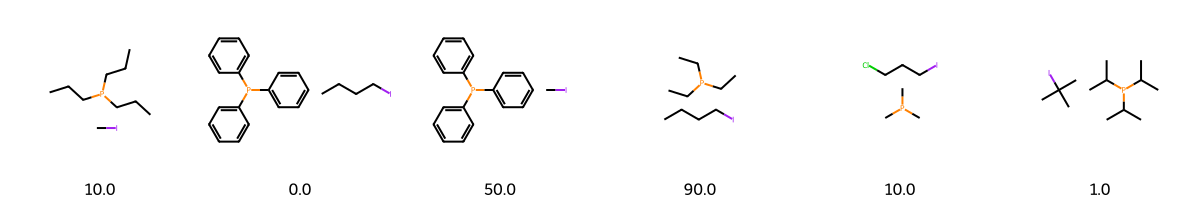

UMAP projection of the reaction space (evaluated samples colored, pruned samples marked with X):


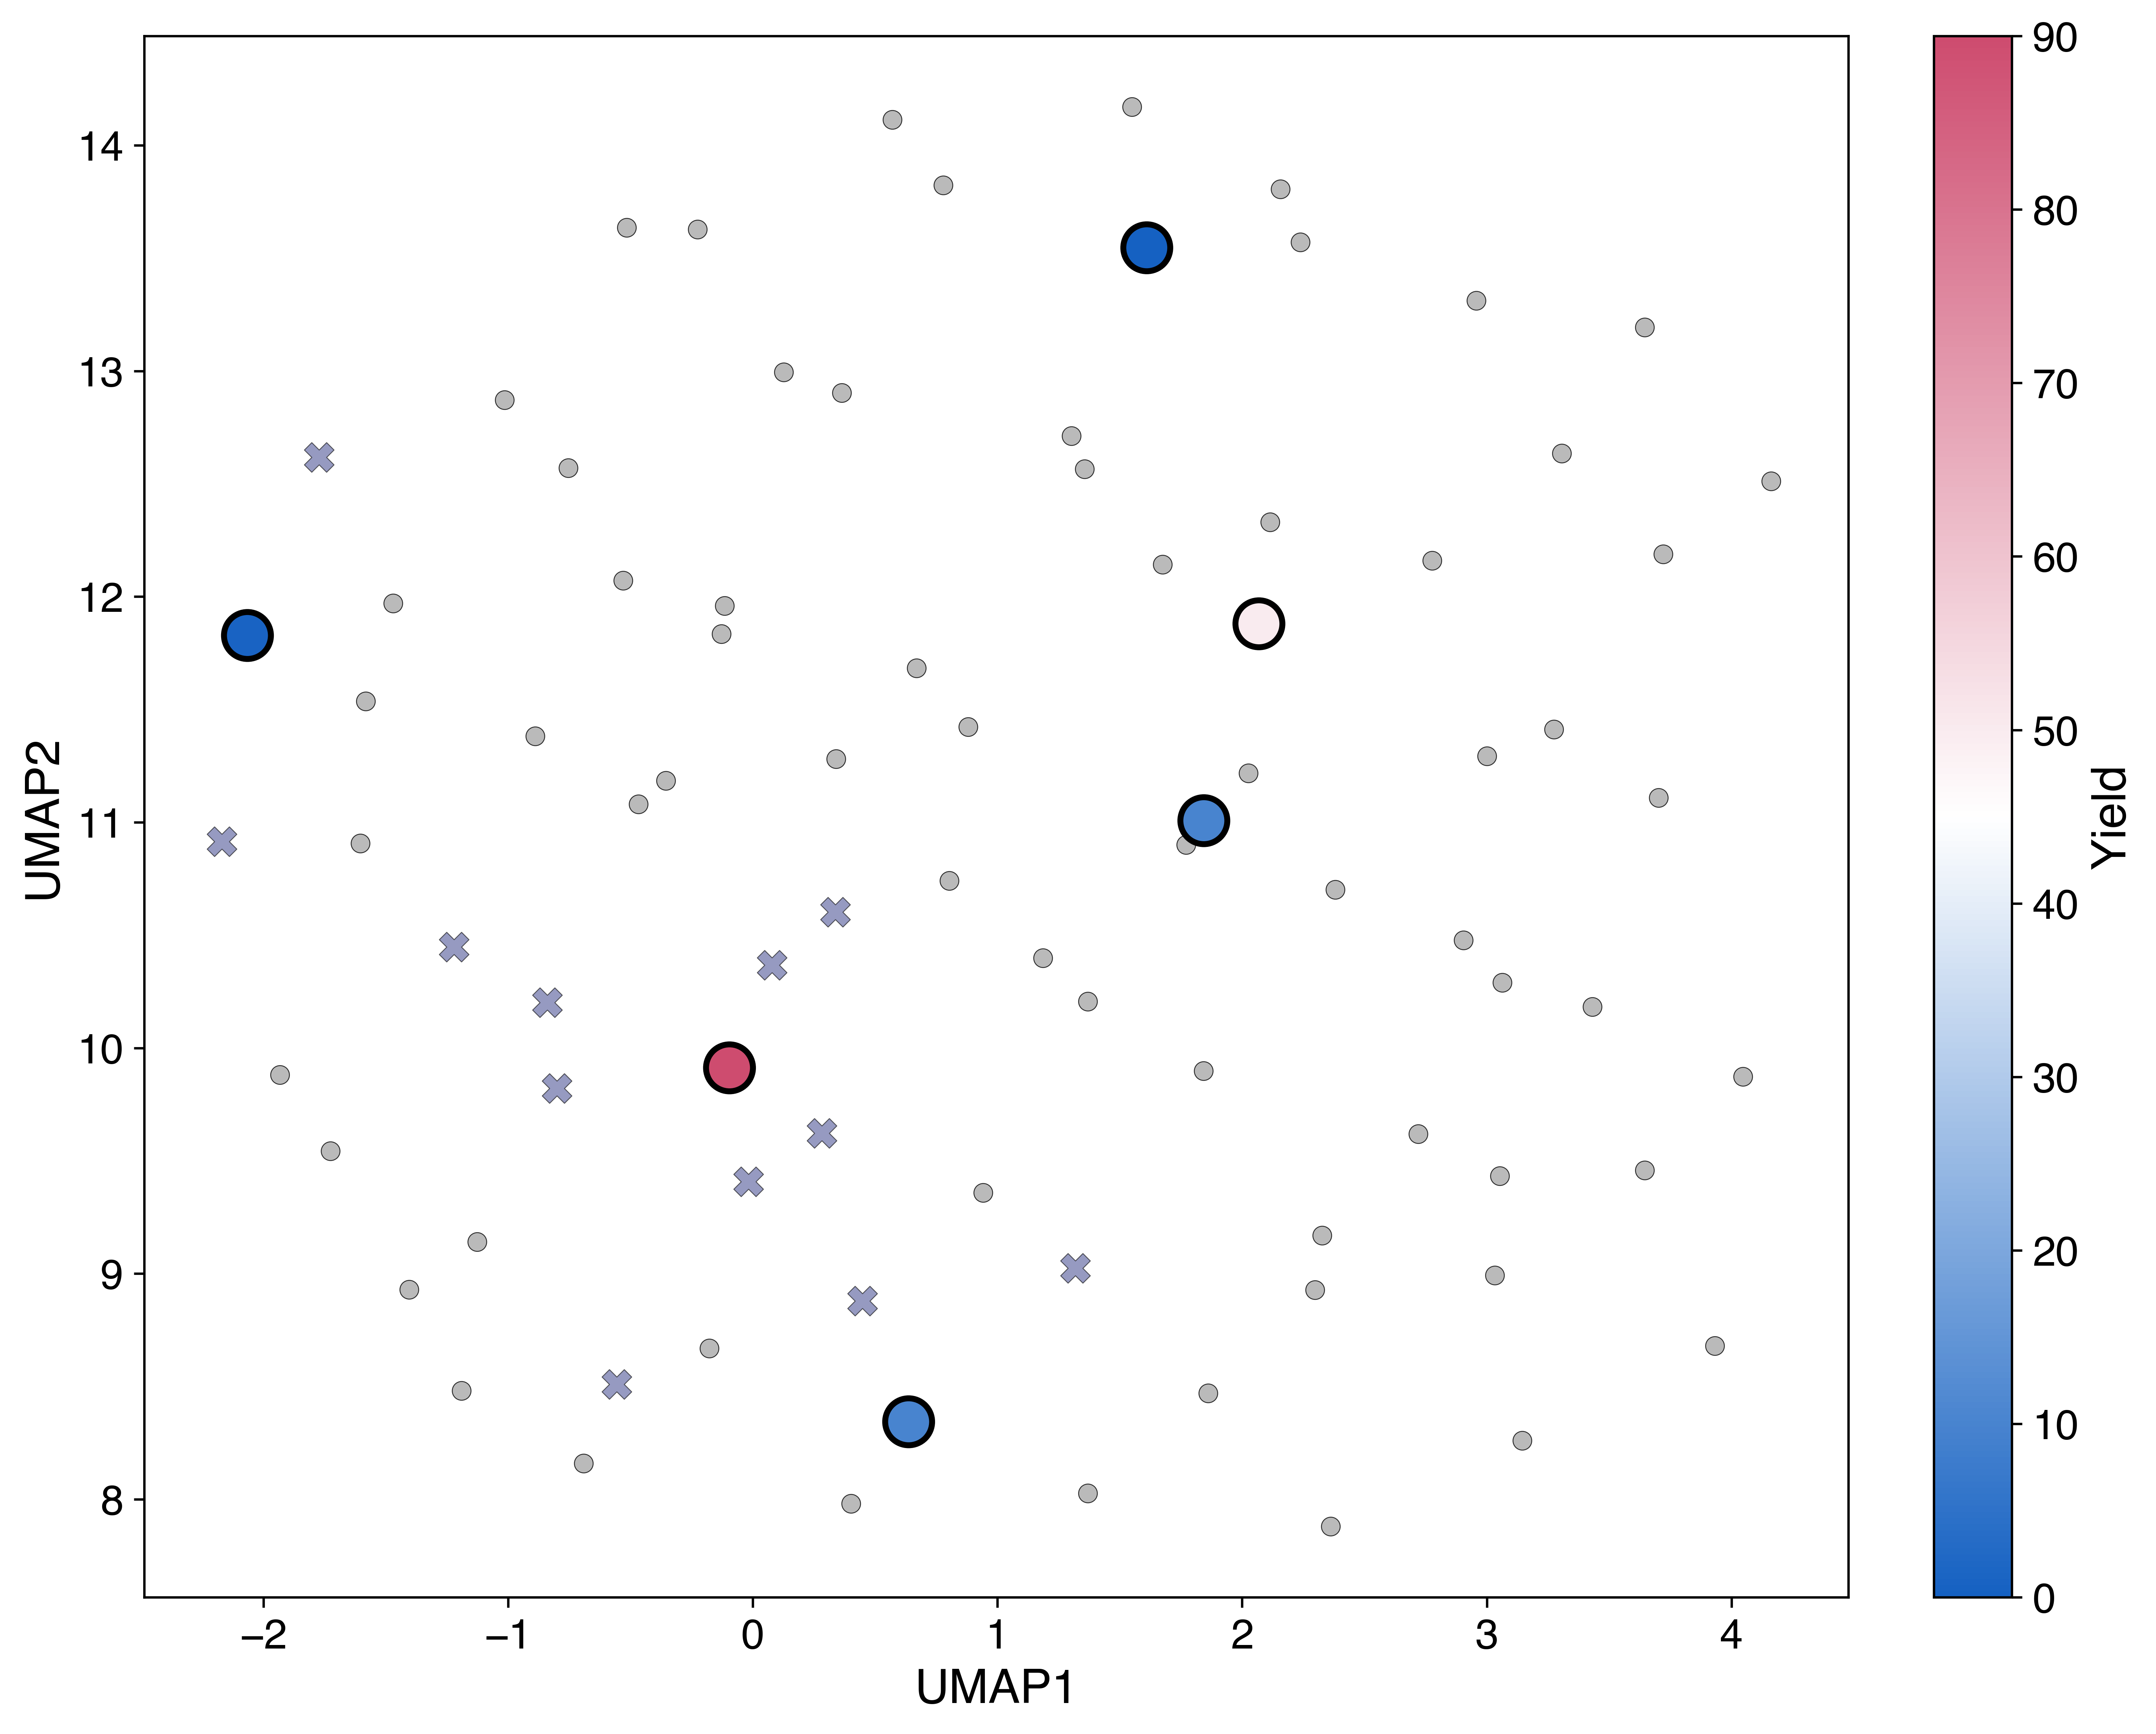

In [12]:
# call the function with the latest search space file
ScopeBO.visualize(filename="reaction_space_round2.csv")

Look at the feature analysis

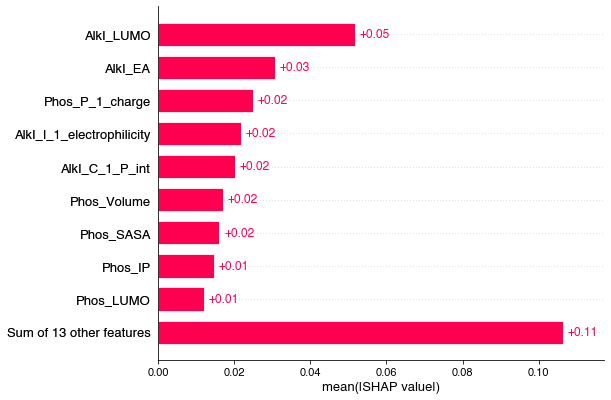

In [13]:
# call the function using the latest searchspace file
shap_values, mean_abs_shap_values = ScopeBO.feature_analysis(filename="reaction_space_round2.csv")

These feature values provide the relative importance of the features for the BO surrogate model predictions. They however do not provide the sign. By extending the function input, we can also generate a beeswarm plot for further insights. This gives the impact on the model output for each sample and feature so that the can also see the sign of the SHAP values (red = high feature value; blue = low feature value).

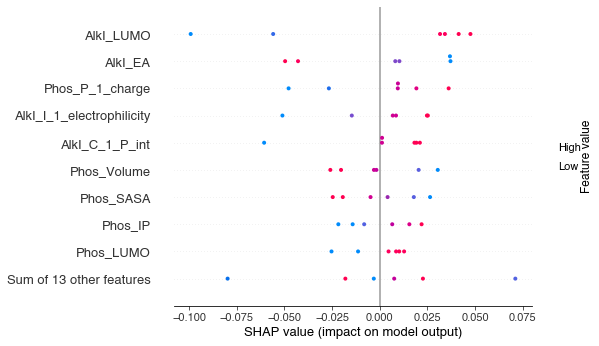

In [14]:
shap_values, mean_abs_shap_values = ScopeBO.feature_analysis(filename="reaction_space_round2.csv",plot_type=['beeswarm'])

Predict the performance for unseen samples

In [15]:
# currently, we only have 6 scope entries which is not sufficient to run the prediction algorithm

# generate some more scope entries by adding results for other search space examples
for i in range(6,27,1):
    df['yield'].iat[i] = np.random.randint(0,101)
df.to_csv("reaction_space_round9.csv")
print(f"There are now {len(df[df['yield'] != 'PENDING'])} entries with results in the reaction scope.")

There are now 27 entries with results in the reaction scope.


In [16]:
# run the prediction function again
model_parameters = ScopeBO.predict_performance(filename="reaction_space_round9.csv",  # search space file
                            objective="yield",  # objective that is predicted
                            further_objectives=None)  # list of further objectives (None in this case)

This might take a moment. Please wait!


Model optimization progress: 100%|██████████| 1000/1000 [00:26<00:00, 37.05it/s]

Model training completed.

Here are the model parameters using scaled features:
AlkI_I_1_nucleophilicity: -3.519538394802096
Phos_SASA: 6.1716320356311165
Phos_HOMO: -2.7059080560622446
Intercept: 44.33333333333336

Model statistics (on outer CV splits):
Mean RMSE: 34.801419473163996
Mean R2 value: 0.045116425580065414

Predictions have been saved in the file 'mlr_predictions.csv' in the folder '.'.


Calculate the Vendi score

In [17]:
ScopeBO().get_vendi_score(filename="reaction_space_round2.csv",objectives=['yield'])

3.011327460351022